Code developed in class with professor Ricardo Destro

FIAP 

In [369]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from sklearn.datasets import fetch_lfw_people

In [370]:
lfw_people = fetch_lfw_people( min_faces_per_person=60,)

In [371]:
n_samples, h, w = lfw_people.images.shape

In [372]:
X = lfw_people.data      #pulling images from datbase

n_features = X.shape[1]  #how many features the data has 

y = lfw_people.target    #how many different people the data contain

target_names = lfw_people.target_names #people's names

n_classes = target_names.shape[0]

In [373]:
print('n_samples: %1d' %(n_samples))
print('n_features: %1d' %(n_features))
print('n_classes: %1d' %(n_classes), '\n')
print('Names', '\n', target_names)

n_samples: 1348
n_features: 2914
n_classes: 8 

Names 
 ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


* We want to reduce the amount of features in the dataset, for this we'll use PCA

#### Visualizing the images

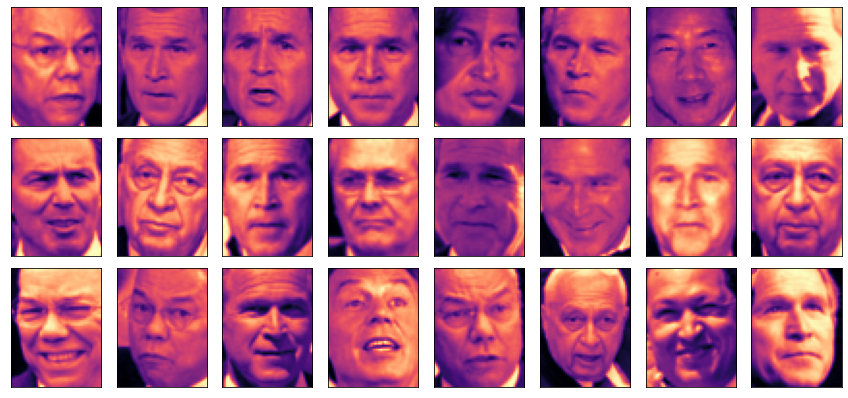

In [374]:
fig, axes = plt.subplots(3, 8, figsize = (15,7),  subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace = 0.1, wspace = 0.1))

for i, ax in enumerate(axes.flat):
    imagem = X[i]
    ax.imshow(imagem.reshape(h, w) , cmap='magma')

#axes.flat gives the code of each subfigure
#reshape received the vector with the image data (stored in X variable), that had 2919 features and, receiving a heigh h and a width w extracted from the database, transforms the vector in a matrix

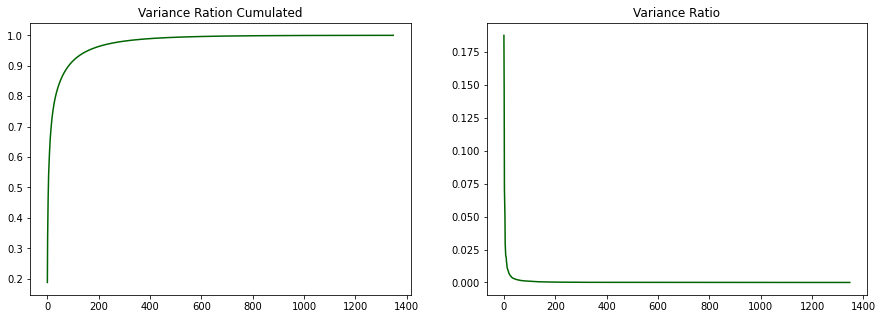

In [375]:
#Defining the number of components

pca = PCA(whiten = True, svd_solver = 'randomized')

pca_data = pca.fit(X)


#Plotting Variance Ratio

fig, axes = plt.subplots(1,2, figsize = (15,5) )

axes[0].plot(np.cumsum(pca_data.explained_variance_ratio_), color='darkgreen')
axes[0].set_title('Variance Ration Cumulated')

axes[1].plot(pca_data.explained_variance_ratio_, color='darkgreen')
axes[1].set_title('Variance Ratio')

plt.show()

In [376]:
for i in range(200):

    print('PC %2d: %5.2f%%  Cumulative: %4.2f%%' %(i, pca_data.explained_variance_ratio_[i]*100, np.cumsum(pca_data.explained_variance_ratio_[i])*100 ))

PC  0: 18.78%  Cumulative: 18.78%
PC  1: 14.55%  Cumulative: 14.55%
PC  2:  7.10%  Cumulative: 7.10%
PC  3:  6.03%  Cumulative: 6.03%
PC  4:  5.04%  Cumulative: 5.04%
PC  5:  2.94%  Cumulative: 2.94%
PC  6:  2.47%  Cumulative: 2.47%
PC  7:  2.05%  Cumulative: 2.05%
PC  8:  1.97%  Cumulative: 1.97%
PC  9:  1.89%  Cumulative: 1.89%
PC 10:  1.56%  Cumulative: 1.56%
PC 11:  1.47%  Cumulative: 1.47%
PC 12:  1.21%  Cumulative: 1.21%
PC 13:  1.10%  Cumulative: 1.10%
PC 14:  1.04%  Cumulative: 1.04%
PC 15:  0.97%  Cumulative: 0.97%
PC 16:  0.91%  Cumulative: 0.91%
PC 17:  0.88%  Cumulative: 0.88%
PC 18:  0.81%  Cumulative: 0.81%
PC 19:  0.71%  Cumulative: 0.71%
PC 20:  0.68%  Cumulative: 0.68%
PC 21:  0.65%  Cumulative: 0.65%
PC 22:  0.60%  Cumulative: 0.60%
PC 23:  0.58%  Cumulative: 0.58%
PC 24:  0.53%  Cumulative: 0.53%
PC 25:  0.52%  Cumulative: 0.52%
PC 26:  0.50%  Cumulative: 0.50%
PC 27:  0.48%  Cumulative: 0.48%
PC 28:  0.45%  Cumulative: 0.45%
PC 29:  0.43%  Cumulative: 0.43%
PC 30:  

* After 150 components the information gain is very small and below 100 the information loss starts increasing

In [377]:
#Defining the number of components

n_components_ = 150

pca = PCA(n_components = n_components_, whiten = True, svd_solver = 'randomized')

pca_data = pca.fit(X)

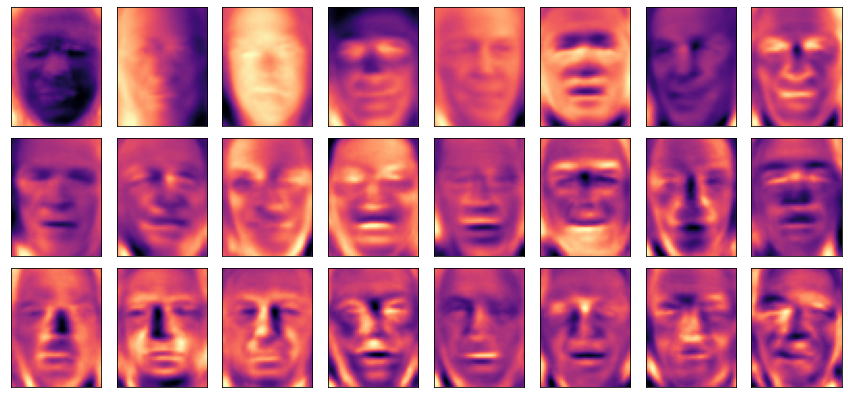

In [378]:
#Plotting the Eigen Faces based on the generated components

fig, axes = plt.subplots(3, 8, figsize = (15,7),  subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace = 0.1, wspace = 0.1))

for i, ax in enumerate(axes.flat):
    imagem = pca_data.components_[i]
    ax.imshow(imagem.reshape(h, w), cmap='magma')


In [379]:
#Fitting the eigen faces to calculate the PCAs

components = pca_data.transform(X)


#Restablishing the dimensions of the data using the 150 components
projected = pca_data.inverse_transform(components)

Text(0.5, 1.0, 'Inverse Transformation')

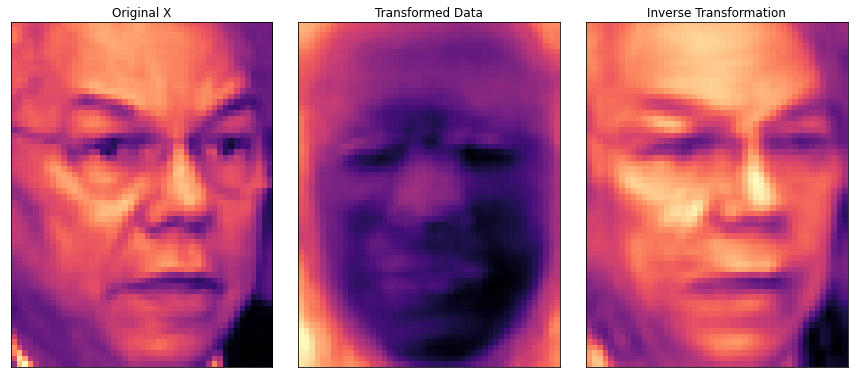

In [380]:
fig, axes = plt.subplots(1, 3, figsize = (15,7),  subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace = 0.1, wspace = 0.1))

axes[0].imshow(X[0].reshape(h,w), cmap='magma')
axes[0].set_title('Original X')

axes[1].imshow(pca_data.components_[0].reshape(h,w), cmap='magma')
axes[1].set_title('Transformed Data')

axes[2].imshow(projected[0].reshape(h,w), cmap='magma')
axes[2].set_title('Inverse Transformation')

Components: 150
Information manteined: 94.57%
Information Lost: 5.43%


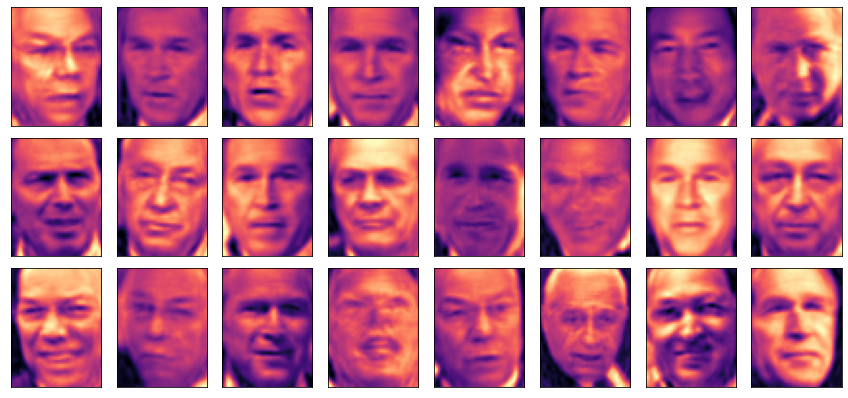

In [381]:
#Plotting the Eigen Faces after Transformation

fig, axes = plt.subplots(3, 8, figsize = (15,7),  subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace = 0.1, wspace = 0.1))

for i, ax in enumerate(axes.flat):

    ax.imshow(projected[i].reshape(h, w), cmap='magma')

pca_data.explained_variance_ratio_.shape


print('Components: %3d' % (pca_data.explained_variance_ratio_.shape))

print('Information manteined: %3.2f%%' %(pca_data.explained_variance_ratio_.sum()*100))

print('Information Lost: %3.2f%%' %((1 - pca_data.explained_variance_ratio_.sum()) *100))

* The images are little blurrier but all faces are still identifiable 